In [79]:
import importlib
import gui
import people
import astar
import main_functions
importlib.reload(gui)
importlib.reload(people)
importlib.reload(astar)
importlib.reload(main_functions)
from gui import GUI
from people import PeopleList
from main_functions import group_num_calculator,one_simulation,plot_with_ci
import matplotlib.pyplot as plt
import numpy as np

# Test Model

In [13]:
# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
# Note the boader of room is of size 1, hence the real room is (1,1)->(26,16)
barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (23, 7), (20, 10), (23, 13)]

seed = 41
delta_time = 0.005  # Timestrp
percent_threshold = 50  # Checkpoint: the percentage of people being moved out

initial_people_count = None
recorded_time = False

# Build GUI
gui = GUI()
gui.add_barrier(barrier_set)
gui.update_gui()

# Build PeopleList saving each people object
people_list = PeopleList(seed)
# Build direction matrix
people_list.direction_matrix(barrier_set)
# Assign groups
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
(n_1,n_2,n_3) = group_num_calculator(N, r_1, r_2, r_3)
group_split = {3: n_3, 2: n_2}
people_list.assign_groups(group_split,seed)


time = 0

# Initial each people
for people in people_list.list:
    gui.add_line(people, people_list.list, people.group_id)
    gui.add_oval(people.loc[0] - people.r, people.loc[1] - people.r,
                 people.loc[0] + people.r, people.loc[1] + people.r, people.id)
gui.update_gui()

initial_people_count = len(people_list.list)

# Move
# start_time = real_time.time() 

while people_list.list:
    i = 0
    while i < len(people_list.list):
        gui.del_line(people_list.list[i].group_id)
        gui.del_oval(people_list.list[i].id)

        if people_list.list[i].loc[0] > 1040 and people_list.list[i].loc[1] >300 and people_list.list[i].loc[1] <380:  # delete people if it goes out of room
            people_list.list.pop(i)
            continue
        i += 1

    # Check the percentage of people who have moved out
    remaining_people_count = len(people_list.list)
    moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

    if not recorded_time and moved_out_percentage >= percent_threshold:
        print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
        recorded_time = True

    people_list.move(barrier_set, delta_time=delta_time,  A_p=2000, A_o=5000, B=-0.08, threshold_ped=1.2, threshold_obs=120,
                     threshold_group=2,q_A=1, beta1=0.4, beta2=0.2)  # ped movement

    for people in people_list.list:  # update position
        gui.add_oval(int(people.loc[0]) - people.r,
                     int(people.loc[1]) - people.r, int(people.loc[0]) + people.r,
                     int(people.loc[1]) + people.r, people.id)
        gui.add_line(people, people_list.list, people.group_id)

    # time = real_time.time() - start_time  # update time
    time += delta_time
    gui.update_time(str(round(time, 3)))
    gui.update_gui()

gui.start()


Time when 50% of people moved out: 24.035 seconds


In [ ]:
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (23, 7), (20, 10), (23, 13)]
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=2000
A_o=5000
B=-0.08
beta1=0.4
beta2=0.2
time = one_simulation(barrier_set, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=True)

In [14]:
print(f"Time when 100% of people moved out: {time:.3f} seconds")

Time when 100% of people moved out: 57.735 seconds


# Global Sensitive Analysis

# Local Sensitive Analysis

# Experiment

## 1. Find an Optimal Obstacle (No Obstacle)

In [31]:
# 😊Default Parameter Setting
r_1 = 0.6 # ratio of 1-ped group
r_2 = 0.35 # ratio of 2-ped group
r_3 = 0.05 # ratio of 3-ped group
N = 15*9 # Total pedestrians
barrier_set = [(0, 0), (27, 17), (26, 8), (22, 7), (23, 10)]
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=2000
A_o=2000
B=-0.08
beta1=1
beta2=3

time,time_perct = one_simulation(barrier_set, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=True)

In [32]:
print(f"Time when {percent_threshold} of people moved out: {time_perct:.3f} seconds")
print(f"Time when 100% of people moved out: {time:.3f} seconds")

Time when 80 of people moved out: 60.480 seconds
Time when 100% of people moved out: 121.805 seconds


### No Obstacle

In [91]:
barrier_set_noobs = [(0, 0), (27, 17), (26, 8)]

r_1 = 1 # ratio of 1-ped group
r_2 = 0 # ratio of 2-ped group
r_3 = 0 # ratio of 3-ped group
N = 15*9 # Total pedestrians
delta_time = 0.005
seed = 41
percent_threshold = 80
A_p=998.97
A_o=998.97
B=-0.08
beta1=1
beta2=3

time_list_noobs = []
time_perct_list_noobs = []
for seed in range(20):
    if (seed+1)%5==0:
        print(f"No.{seed+1} Simulation")
    time, time_perct = one_simulation(barrier_set_noobs, percent_threshold, 
                   r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                   N, delta_time, seed, gui_display=False)
    time_list_noobs.append(time)
    time_perct_list_noobs.append(time_perct)

No.5 Simulation
No.10 Simulation
No.15 Simulation
No.20 Simulation


In [92]:
print(f"Mean time (all out) for no-obstacle: {np.mean(time_list_noobs):.2f} seconds")
print(f"Std-erro of time (all out) for no-obstacle: {np.std(time_list_noobs):.2f}")
print(f"Mean time ({percent_threshold} out) for no-obstacle: {np.mean(time_perct_list_noobs):.2f} seconds")
print(f"Std-erro of time ({percent_threshold} out) for no-obstacle: {np.std(time_perct_list_noobs):.2f}")

Mean time (all out) for no-obstacle: 24.91 seconds
Std-erro of time (all out) for no-obstacle: 3.55
Mean time (80 out) for no-obstacle: 16.27 seconds
Std-erro of time (80 out) for no-obstacle: 2.30


### Horizontal Panel

In [53]:
r_1 = 1
r_2 = 0
r_3 = 0
A_p=998.97
A_o=998.97
time_list_d = []
time_perct_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    for seed in range(10):
        time_list = []
        time_perct_list = []
        barrier_set = barrier_set_noobs + [(26-d-1,7),(26-d,10)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_d.append(np.mean(time_list)) 
    time_perct_list_d.append(np.mean(time_perct_list)) 

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


In [54]:
print(time_list_d)
print(time_perct_list_d)

[30.53999999999821, 29.754999999998365, 27.004999999998912, 26.489999999999014, 26.834999999998946]
[22.69, 19.345, 18.68, 18.205, 18.31]


### Vertical Panel

In [85]:

r_1 = 1
r_2 = 0
r_3 = 0
A_p=998.97
A_o=998.97
time_list_d = []
time_perct_list_d = []
for d in range(2, 7):
    print(f"No.{d-1} Simulation(d={d})")
    time_list_temp = []
    time_perct_list_temp = []
    for seed in range(20):
        barrier_set = barrier_set_noobs + [(26-d-4, 8), (26-d, 9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list_temp.append(time)
        time_perct_list_temp.append(time_perct)
    time_list_d.append(time_list_temp)
    time_perct_list_d.append(time_perct_list_temp)
    

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


In [89]:
# time_list_d_vertic_len4 = time_list_d
# time_perct_list_d_vertic_len4 = time_perct_list_d

# print(time_list_d_vertic_len4)
# print(time_perct_list_d_vertic_len4)

[[26.029999999999106, 29.43499999999843, 23.34999999999964, 27.444999999998824, 25.169999999999277, 22.94499999999972, 20.23500000000026, 21.83499999999994, 25.194999999999272, 28.159999999998682, 20.38500000000023, 26.429999999999026, 23.669999999999575, 25.289999999999253, 27.649999999998784, 21.764999999999954, 25.674999999999176, 25.50999999999921, 22.704999999999767, 30.27999999999826], [25.80999999999915, 30.269999999998262, 22.854999999999738, 28.889999999998537, 25.979999999999116, 23.134999999999682, 19.57000000000039, 22.73499999999976, 24.019999999999506, 28.749999999998565, 19.88500000000033, 26.924999999998928, 24.114999999999487, 26.41999999999903, 27.084999999998896, 21.475000000000012, 26.00499999999911, 25.70499999999917, 21.54, 31.874999999997943], [25.65499999999918, 30.23999999999827, 23.309999999999647, 27.984999999998717, 24.774999999999356, 23.274999999999654, 20.42500000000022, 24.174999999999475, 24.14499999999948, 27.85999999999874, 20.07000000000029, 26.94999

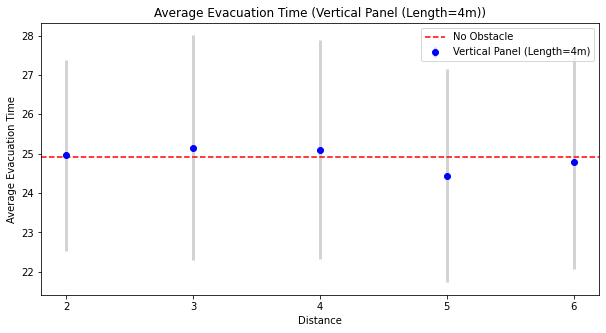

In [93]:
plot_with_ci(time_list_d_vertic_len4,range(2,7), obstacle_type='Vertical Panel (Length=4m)', value_noobs=24.91)

In [63]:
# vertical panel with length of 4
r_1 = 1
r_2 = 0
r_3 = 0
A_p=998.97
A_o=998.97
time_list_d = []
time_perct_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    for seed in range(10):
        time_list = []
        time_perct_list = []
        barrier_set = barrier_set_noobs + [(26-d-4,8),(26-d,9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_d.append(np.mean(time_list)) 
    time_perct_list_d.append(np.mean(time_perct_list)) 

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


In [64]:
print(time_list_d)
print(time_perct_list_d)

[28.159999999998682, 28.749999999998565, 27.85999999999874, 26.439999999999024, 28.0749999999987]
[19.055, 18.365, 18.86, 18.18, 18.125]


In [49]:
# vertical panel with length of 3

# r_1 = 1
# r_2 = 0
# r_3 = 0
# A_p=998.97
# A_o=998.97
# time_list_d = []
# time_perct_list_d = []
# for d in range(2,7):
#     print(f"No.{d-1} Simulation(d={d})")
#     for seed in range(10):
#         time_list = []
#         time_perct_list = []
#         barrier_set = barrier_set_noobs + [(26-d-3,8),(26-d,9)]
#         time, time_perct = one_simulation(barrier_set, percent_threshold, 
#                     r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
#                     N, delta_time, seed, gui_display=False)
#         time_list.append(time)
#         time_perct_list.append(time_perct)
#     time_list_d.append(np.mean(time_list)) 
#     time_perct_list_d.append(np.mean(time_perct_list)) 

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


In [50]:
# print(time_list_d)
# print(time_perct_list_d)

[28.81499999999855, 25.894999999999133, 25.86499999999914, 26.80999999999895, 27.184999999998876]
[19.405, 17.955, 18.17, 17.77, 18.42]


### Two Pillars

In [59]:
# r_1 = 1
# r_2 = 0
# r_3 = 0
# A_p=998.97
# A_o=998.97
# time_list_d = []
# time_perct_list_d = []
# for d in range(2,7):
#     print(f"No.{d-1} Simulation(d={d})")
#     for seed in range(10):
#         time_list = []
#         time_perct_list = []
#         barrier_set = barrier_set_noobs + [(26-d-1,7),(26-d,8),(26-d-1,9),(26-d,10)]
#         time, time_perct = one_simulation(barrier_set, percent_threshold, 
#                     r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
#                     N, delta_time, seed, gui_display=False)
#         time_list.append(time)
#         time_perct_list.append(time_perct)
#     time_list_d.append(np.mean(time_list)) 
#     time_perct_list_d.append(np.mean(time_perct_list)) 

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)


KeyboardInterrupt: 

In [60]:
# print(time_list_d)
# print(time_perct_list_d)

[1106.1600000009346, 29.71999999999837, 488.5599999996282]
[19.37, 19.665, 18.485]


In [ ]:
r_1 = 1
r_2 = 0
r_3 = 0
A_p=998.97
A_o=998.97
time_list_d = []
time_perct_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    for seed in range(10):
        time_list = []
        time_perct_list = []
        barrier_set = barrier_set_noobs + [(26-d-1,6),(26-d,7),(26-d-1,10),(26-d,11)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_d.append(np.mean(time_list)) 
    time_perct_list_d.append(np.mean(time_perct_list)) 

In [ ]:
print(time_list_d)
print(time_perct_list_d)

### One Pillar

In [61]:
r_1 = 1
r_2 = 0
r_3 = 0
A_p=998.97
A_o=998.97
time_list_d = []
time_perct_list_d = []
for d in range(2,7):
    print(f"No.{d-1} Simulation(d={d})")
    for seed in range(10):
        time_list = []
        time_perct_list = []
        barrier_set = barrier_set_noobs + [(26-d-1,8),(26-d,9)]
        time, time_perct = one_simulation(barrier_set, percent_threshold, 
                    r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                    N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_d.append(np.mean(time_list)) 
    time_perct_list_d.append(np.mean(time_perct_list)) 

No.1 Simulation(d=2)
No.2 Simulation(d=3)
No.3 Simulation(d=4)
No.4 Simulation(d=5)
No.5 Simulation(d=6)


In [62]:
print(time_list_d)
print(time_perct_list_d)

[29.47999999999842, 27.849999999998744, 27.124999999998888, 27.31999999999885, 28.494999999998615]
[19.05, 19.06, 18.3, 18.1, 18.18]


## Impact of Group-Split 

In [100]:
group_split = [(0.3, 0.1, 0.6), (0.1, 0.3, 0.6), (0, 0, 1)]
A_p=998.97
A_o=998.97
B=-0.08
beta1=0.5
beta2=3

### No Obstacle

In [101]:
time_list_g_noobs = []
time_perct_list_g_noobs = [] 
for (r_3, r_2, r_1) in group_split:
    for seed in range(1):
        time_list = []
        time_perct_list = []
        if (seed+1)%5==0:
            print(f"No.{seed+1} Simulation")
        time, time_perct = one_simulation(barrier_set_noobs, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_g_noobs.append(np.mean(time_list)) 
    time_perct_list_g_noobs.append(np.mean(time_perct_list))

In [102]:
print(time_list_g_noobs)
print(time_perct_list_g_noobs)

[68.03000000001062, 55.21000000000979, 28.584999999998598]
[30.805, 34.085, 20.425]


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


TypeError: '>' not supported between instances of 'float' and 'NoneType'

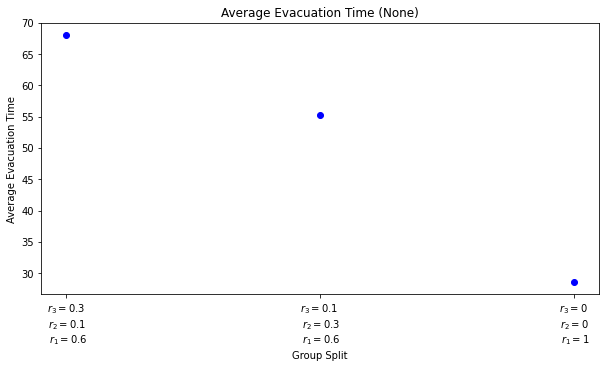

In [105]:
x_axis = ["$r_3=0.3$ \n $r_2=0.1$ \n $r_1=0.6$", 
                 "$r_3=0.1$ \n $r_2=0.3$ \n $r_1=0.6$", 
                 "$r_3=0$ \n $r_2=0$ \n $r_1=1$"]
plot_with_ci(time_list_g_noobs, x_axis, None, None, xlabel='Group Split', ylabel='Average Evacuation Time')

### Optimal Obstacle

In [ ]:
d = 5
optimal_obs = barrier_set_noobs + [(26-d-4, 8), (26-d, 9)]

time_list_g_yesobs = []
time_perct_list_g_yesobs = [] 
for (r_3, r_2, r_1) in group_split:
    for seed in range(20):
        time_list = []
        time_perct_list = []
        if (seed+1)%5==0:
            print(f"No.{seed+1} Simulation")
        time, time_perct = one_simulation(optimal_obs, percent_threshold, 
                                          r_1, r_2, r_3, A_p, A_o, B, beta1, beta2,
                                          N, delta_time, seed, gui_display=False)
        time_list.append(time)
        time_perct_list.append(time_perct)
    time_list_g_yesobs.append(np.mean(time_list)) 
    time_perct_list_g_yesobs.append(np.mean(time_perct_list))

In [ ]:
print(time_list_g_yesobs)
print(time_perct_list_g_yesobs)

In [ ]:
x_axis = ["$r_3=0.3$ \n $r_2=0.1$ \n $r_1=0.6$", 
                 "$r_3=0.1$ \n $r_2=0.3$ \n $r_1=0.6$", 
                 "$r_3=0$ \n $r_2=0$ \n $r_1=1$"]
plot_with_ci(time_list_g_noobs, x_axis, None, None, xlabel='Group Split', ylabel='Average Evacuation Time')